In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

import glob as glob
import os as os
import six

import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pickle as pkl

sns.set_color_codes()
sns.set_palette("hls")  

from scipy.stats import spearmanr

import matplotlib.gridspec as gridspec

sns.set_style("white")
sns.set_context(rc = {'patch.linewidth': 0.0})

In [2]:
gray = '#0075b0'
mov_grat= '#f32974'
pix_noise = '#ff7047'
stat_grat = '#869fdc'

gray_100 = '#004264'
gray_75 = '#0075b0'
gray_50 = '#00a8fd'

mov_grat_50 = '#f771a3'
mov_grat_75 = '#f32974'
mov_grat_100 = '#c40b50'

In [3]:
L1_data = pd.read_pickle("L1_data.pkl")
Mi1_data = pd.read_pickle("Mi1_data.pkl")
Tm1_data = pd.read_pickle("Tm1_data.pkl")
Tm2_data = pd.read_pickle("Tm2_data.pkl")
Tm3_data = pd.read_pickle("Tm3_data.pkl")

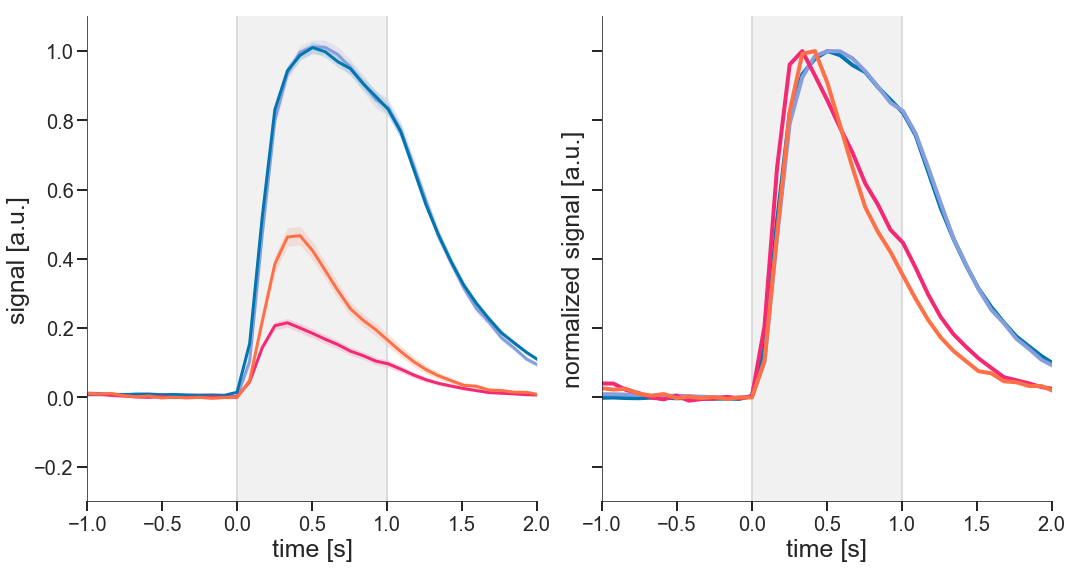

In [5]:
#for Figure 2
data = Tm3_data

#for Figure S1
#data = Mi1_data


fig = plt.figure(figsize = (15,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])

ci = 68


#windows for normalisation, maximum value of the signal
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]
maximum = data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max()

offset = 0.01
    
time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)] 

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax1, time = time,
          data = offset+(data.xs(( 1.,  "stat_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "stat_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1., "stat_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = stat_grat, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = offset+(data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1., "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = offset+(data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1., "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = offset+(data.xs(( 1.,  "pix_noise, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "pix_noise, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1., "pix_noise, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = pix_noise, err_style = 'ci_band', ci = ci, alpha = 1.0)

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.set_xlim(-1, 2)
ax1.set_ylim(-.3, 1.1)
ax1.set_ylabel('signal [a.u.]', fontsize = 25)
ax1.set_xlabel('time [s]', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)

ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, (data.xs(( 1.,"gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = stat_grat, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = pix_noise, linewidth = 4, alpha = 1)


ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
#ax2.axvline(-1, color = 'black', linestyle = '--')
#ax2.axvline(2.5,color = 'black', linestyle = '--')
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.3, 1.1)
ax2.set_ylabel('normalized signal [a.u.]', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
sns.despine(ax = ax2)
ax2.set_yticklabels(["","",""], fontsize = 18)

ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

plt.tight_layout()

/Users/pirogova/opt/anaconda3/envs/myenv_python2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


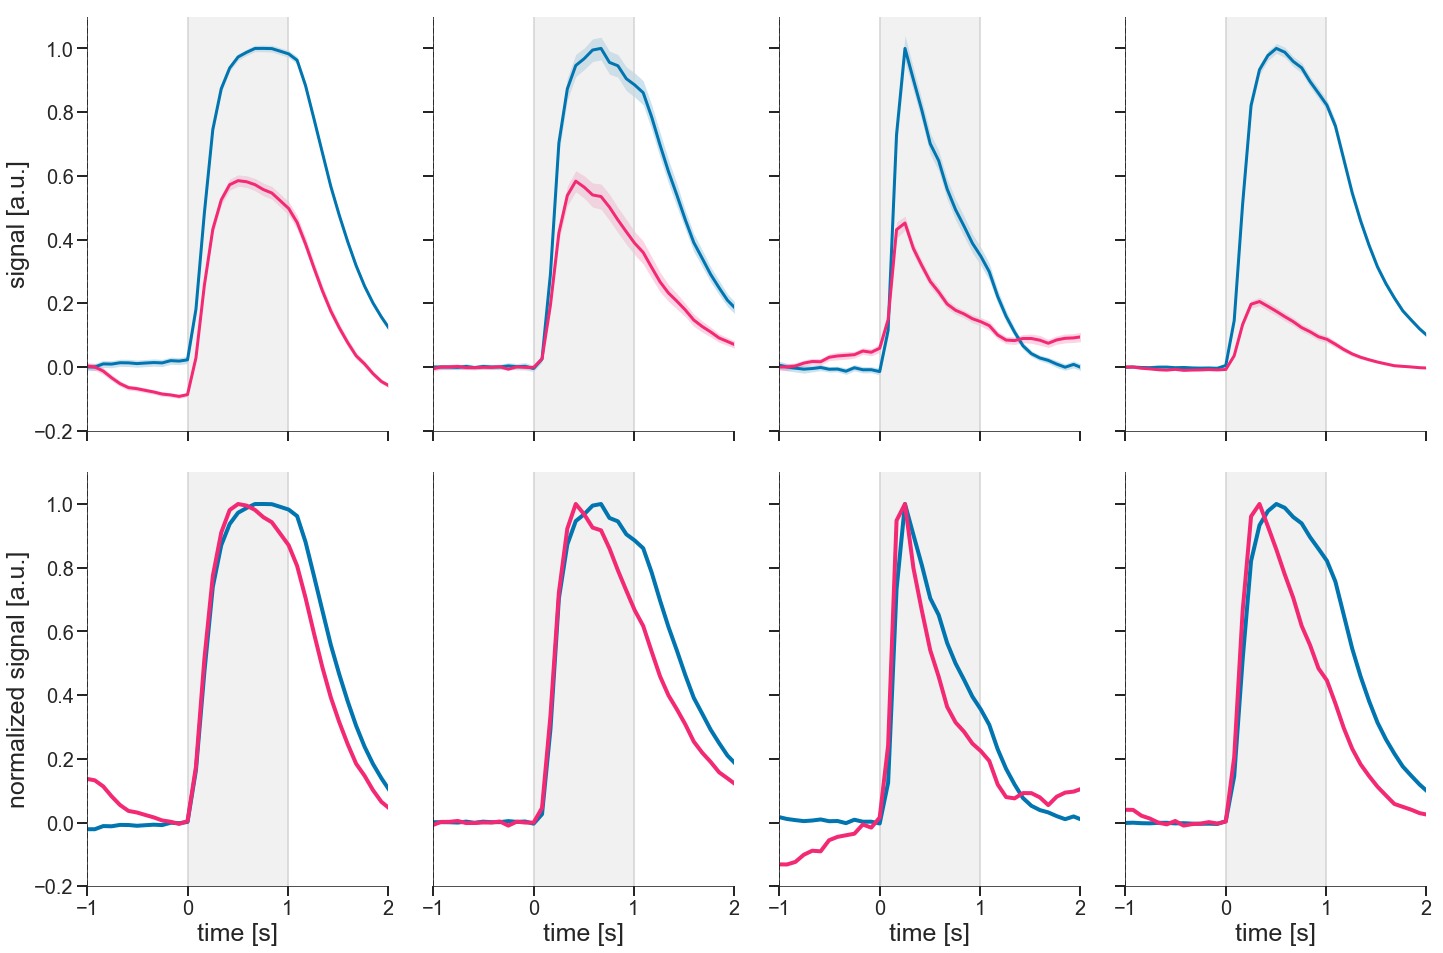

In [7]:
#for Figure 3

fig = plt.figure(figsize = (24,16))
gs1 = gridspec.GridSpec(2,4, wspace = 0.15, hspace = 0.1)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0]) #Mi1
    ax2 = plt.subplot(gs1[1,0])
    ax3 = plt.subplot(gs1[0,1]) #Tm1
    ax4 = plt.subplot(gs1[1,1])
    ax5 = plt.subplot(gs1[0,3]) #Tm3
    ax6 = plt.subplot(gs1[1,3])
    ax7 = plt.subplot(gs1[0,2]) #Tm2
    ax8 = plt.subplot(gs1[1,2])

ci = 68

#windows for normalisation
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]

data = Mi1_data
        
time = np.sort(data.loc[1].index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

maximum = np.max([data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max(), data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities')).mean(1).max()])

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.axvline(-1, color = 'black', linestyle = '--')
ax1.axvline(2.5,color = 'black', linestyle = '--')
ax1.set_xlim(-1, 2)
ax1.set_ylim(-.2, 1.1)
ax1.set_ylabel('signal [a.u.]', fontsize = 25)
ax1.set_xlabel('')
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.get_legend().remove()
ax1.tick_params(direction='out', length=10, width=2)
ax1.set_xticklabels(["","",""], fontsize = 18)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)


ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax2.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax2.axvline(-1, color = 'black', linestyle = '--')
ax2.axvline(2.5,color = 'black', linestyle = '--')
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.2, 1.1)
sns.despine(ax = ax2)
ax2.set_ylabel('normalized signal [a.u.]', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()



data = Tm2_data
maximum = np.max([data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max(), data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities')).mean(1).max()])

ax7.axvline(0, color = 'lightgrey')
ax7.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax7, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax7, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax7.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax7.axvline(-1, color = 'black', linestyle = '--')
ax7.axvline(2.5,color = 'black', linestyle = '--')
ax7.set_xlim(-1, 2)
ax7.set_ylim(-.2, 1.1)
ax7.set_xlabel('')
ax7.tick_params(axis="x", labelsize=20)
ax7.tick_params(axis="y", labelsize=20)
ax7.get_legend().remove()
ax7.tick_params(direction='out', length=10, width=2)
ax7.set_xticklabels(["","",""], fontsize = 18)
ax7.set_yticklabels(["","",""], fontsize = 18)
ax7.xaxis.tick_bottom()
ax7.yaxis.tick_left()
sns.despine(ax = ax7)

ax8.axvline(0, color = 'lightgrey')
ax8.axvline(1, color = 'lightgrey')

ax8.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax8.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax8.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax8.axvline(-1, color = 'black', linestyle = '--')
ax8.axvline(2.5,color = 'black', linestyle = '--')
ax8.set_xlim(-1, 2)
ax8.set_ylim(-.2, 1.1)
sns.despine(ax = ax8)
ax8.tick_params(axis="x", labelsize=20)
ax8.tick_params(axis="y", labelsize=20)
ax8.set_xlabel('time [s]', fontsize = 25)
ax8.tick_params(direction='out', length=10, width=2)
ax8.set_yticklabels(["","",""], fontsize = 18)
ax8.xaxis.tick_bottom()
ax8.yaxis.tick_left()



data = Tm1_data

maximum = np.max([data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max(), data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities')).mean(1).max()])

ax3.axvline(0, color = 'lightgrey')
ax3.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax3, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax3, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax3.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax3.axvline(-1, color = 'black', linestyle = '--')
ax3.axvline(2.5,color = 'black', linestyle = '--')
ax3.set_xlim(-1, 2)
ax3.set_ylim(-.2, 1.1)
ax3.tick_params(axis="x", labelsize=20)
ax3.tick_params(axis="y", labelsize=20)
ax3.get_legend().remove()
ax3.set_yticklabels(["","",""], fontsize = 18)
ax3.tick_params(direction='out', length=10, width=2)
ax3.set_xticklabels(["","",""], fontsize = 18)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()
sns.despine(ax = ax3)


ax4.axvline(0, color = 'lightgrey')
ax4.axvline(1, color = 'lightgrey')

ax4.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax4.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax4.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax4.axvline(-1, color = 'black', linestyle = '--')
ax4.axvline(2.5,color = 'black', linestyle = '--')
ax4.set_xlim(-1, 2)
ax4.set_ylim(-.2, 1.1)
sns.despine(ax = ax4)
ax4.tick_params(axis="x", labelsize=20)
ax4.tick_params(axis="y", labelsize=20)
ax4.set_yticks([])
ax4.set_xlabel('time [s]', fontsize = 25)
ax4.tick_params(direction='out', length=10, width=2)
ax4.xaxis.tick_bottom()
ax4.yaxis.tick_left()


data = Tm3_data

maximum = np.max([data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max(), data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities')).mean(1).max()])


ax5.axvline(0, color = 'lightgrey')
ax5.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax5, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax5, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).divide(maximum-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")


ax5.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax5.axvline(-1, color = 'black', linestyle = '--')
ax5.axvline(2.5,color = 'black', linestyle = '--')
ax5.set_xlim(-1, 2)
ax5.set_ylim(-.2, 1.1)
ax5.set_xticklabels(["","",""], fontsize = 18)
ax5.set_yticklabels(["","",""], fontsize = 18)
ax5.tick_params(axis="x", labelsize=20)
ax5.tick_params(axis="y", labelsize=20)
ax5.get_legend().remove()
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
sns.despine(ax = ax5)

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

ax6.axvline(0, color = 'lightgrey')
ax6.axvline(1, color = 'lightgrey')

ax6.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax6.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax6.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax6.axvline(-1, color = 'black', linestyle = '--')
ax6.axvline(2.5,color = 'black', linestyle = '--')
ax6.set_xlim(-1, 2)
ax6.set_ylim(-.2, 1.1)
ax6.set_xlabel('time [s]', fontsize = 25)
ax6.tick_params(axis="x", labelsize=20)
ax6.tick_params(axis="y", labelsize=20)
ax6.set_yticklabels(["","",""], fontsize = 18)
ax6.tick_params(direction='out', length=10, width=2)
sns.despine(ax = ax6)
ax6.xaxis.tick_bottom()
ax6.yaxis.tick_left()


plt.tight_layout()

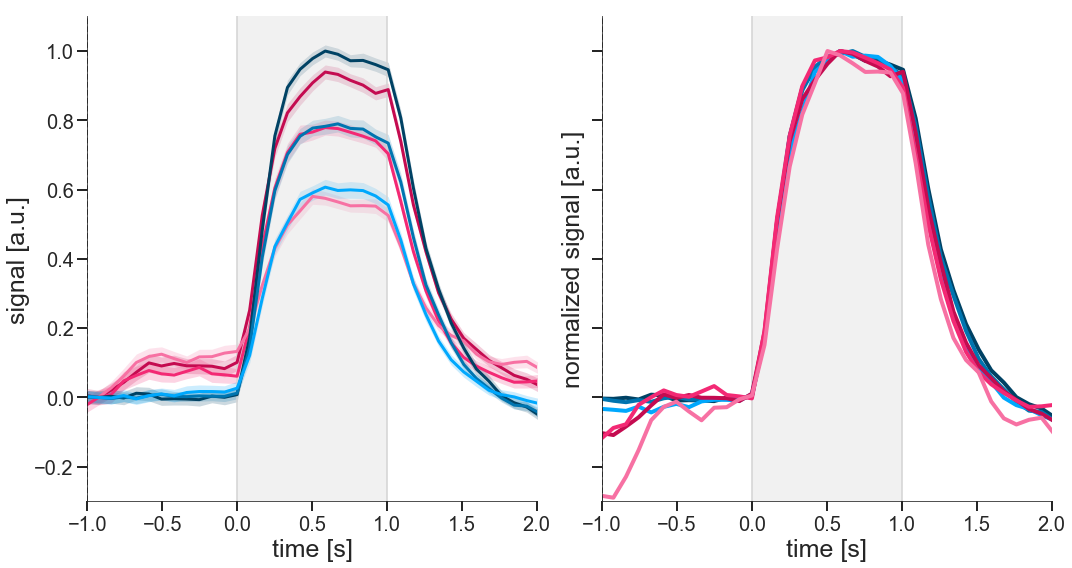

In [8]:
#for Figure 5(B)
#data = Tm3_data

#for Figure 5(C)
#data = Mi1_data

#for Figure S2
data = L1_data



fig = plt.figure(figsize = (15,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])

#windows for normalisation
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]    
offset = 0.01
    
ci = 68

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]
  
    
maximum = np.max([data.xs(( 1.0, "gray, 75%"), level = ("step_dts",'velocities')).mean(1).max(),  data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities')).mean(1).max(), data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities')).mean(1).max()])

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')    

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1., "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_100,err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "mov_grat, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "mov_grat, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_75, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "mov_grat, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "mov_grat, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_50, err_style = 'ci_band', ci = ci, alpha = 1.0)

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1., "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_100,err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "gray, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "gray, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_75, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "gray, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).divide(maximum-data.xs(( 1.,  "gray, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_50, err_style = 'ci_band', ci = ci, alpha = 1.0)

#ax1.set_title("n = " + str(len(flies))+', N = ' +str(len(np.unique(flies))) + ' --> 1 sec step', fontsize = 20)  
ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.axvline(-1, color = 'black', linestyle = '--')
ax1.axvline(2.5,color = 'black', linestyle = '--')
ax1.set_xlim(-1, 2)
ax1.set_ylim(-.3, 1.1)
ax1.set_ylabel('signal [a.u.]', fontsize = 25)
ax1.set_xlabel('time [s]', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)


ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, (data.xs(( 1., "gray, 100%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 100%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 100%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_100, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "gray, 75%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 75%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 75%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 75%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_75, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "gray, 50%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 50%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 50%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 50%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_50, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 100%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 100%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 100%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_100, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 75%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 75%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 75%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 75%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_75, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 50%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 50%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 50%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 50%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_50, linewidth = 4,  alpha = 1.0)

ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax2.axvline(-1, color = 'black', linestyle = '--')
ax2.axvline(2.5,color = 'black', linestyle = '--')
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.3, 1.1)
ax2.set_ylabel('normalized signal [a.u.]', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
sns.despine(ax = ax2)
ax2.set_yticklabels(["","",""], fontsize = 18)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

plt.tight_layout()

